La regresion lineal es utilizada en preguntas donde solo hay dos respuestas, se basa en probabilidades entre 0 y 1, genera una tabla con forma de S, el profesor da el ejemplo entre si en una imagen hay un perro o un gato, mientras sea menor que el 0.5 se considerara un gato, mientras si es mayor al 0.5 se considerara como un perro

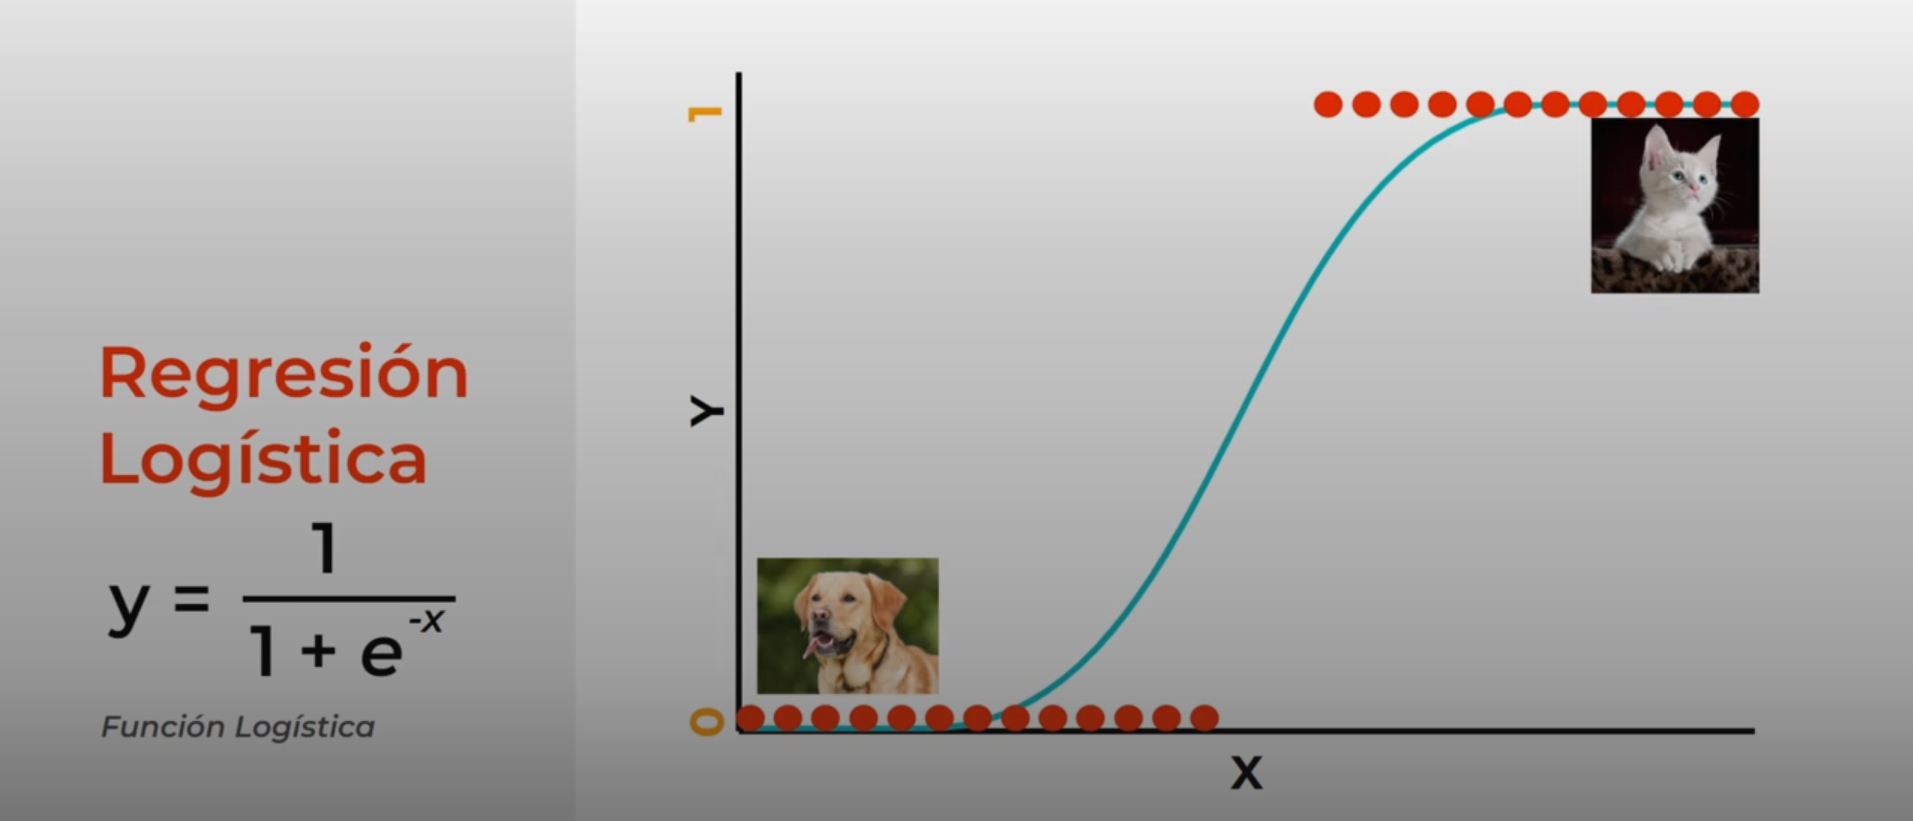

In [ ]:
import pandas as pd
import seaborn as sb
import sklearn.linear_model as sk
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
datas = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sets de datos Machine Learning/U4_04_train.csv")

In [ ]:
datas.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

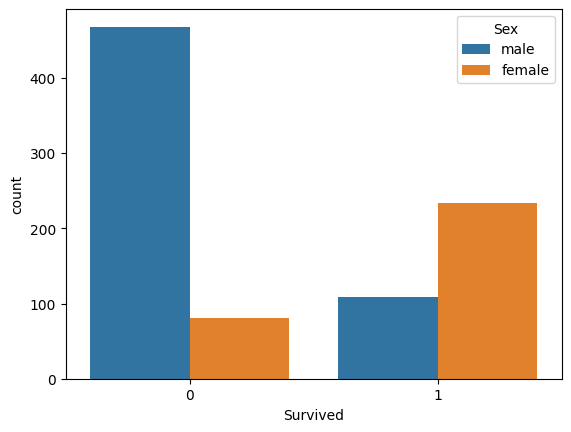

In [ ]:
sb.countplot(x="Survived", data = datas, hue = "Sex")

In [ ]:
datas.isna().sum()
#revisa si hay algun dato con una categoria nula, se quitara la categoria cabin y en age los nulos se les agregara el promedio

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


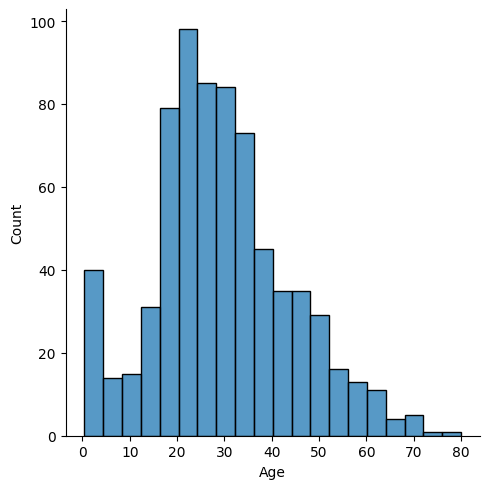

In [ ]:
sb.displot(x="Age", data=datas)

In [ ]:
datas["Age"].mean() #el promedio
datas["Age"].fillna(datas["Age"].mean())
datas["Age"] = datas["Age"].fillna(datas["Age"].mean())

In [ ]:
datas = datas.drop(["Cabin"], axis=1)
datas = datas.dropna()
datas = datas.drop(["Name", "PassengerId", "Ticket"], axis = 1)
#se deshace de todas las columnas con datos que no sirven

In [ ]:
dummiesSex= pd.get_dummies(datas["Sex"], dtype=int).drop("male",axis=1)
#Pasa el sexo a booleano de 0 y 1, asi se evita el multicollinearity, osea vuelve las variables en independientes (ser hombre y mujer si eran dependientes uno del otro)

In [ ]:
datas = datas.join(dummiesSex)

In [ ]:
datas = datas.drop(["Sex"], axis = 1)

<Axes: xlabel='Survived', ylabel='count'>

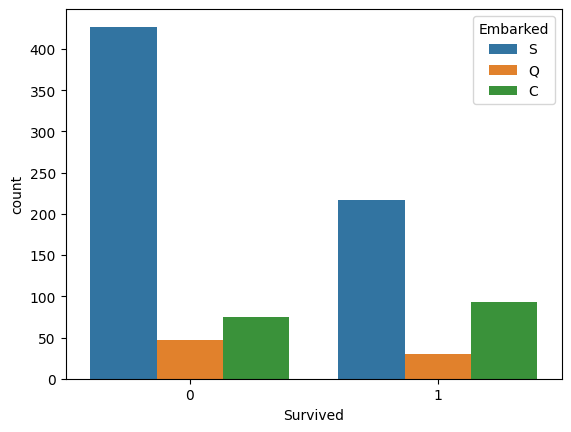

In [ ]:
sb.countplot(x="Survived", data = datas, hue = "Embarked")

In [ ]:
dummiesEmbarked= pd.get_dummies(datas["Embarked"], dtype = int, drop_first = True)
datas = datas.drop(["Embarked"], axis = 1)

In [ ]:
datas = datas.join(dummiesEmbarked)

<Axes: >

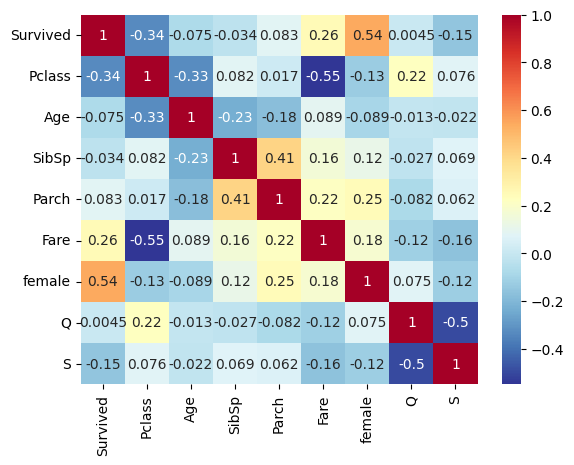

In [ ]:
sb.heatmap(datas.corr(), annot = True, cmap = "RdYlBu_r")
#fare es el dinero con el que pagaron el boleto, Parch es la cantidad de padres e hijos del pasajero

In [ ]:
datas.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,Q,S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,1
4,0,3,35.0,0,0,8.0500,0,0,1


<Axes: xlabel='Survived', ylabel='count'>

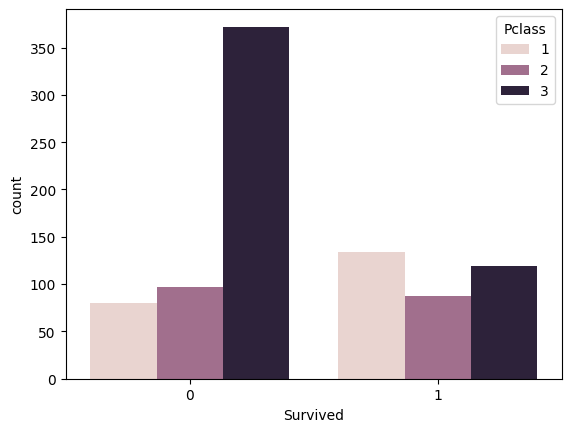

In [ ]:
sb.countplot(x="Survived", data = datas, hue = "Pclass")
#De la mayoria que no sobrevivieron eran de tercera clase (los que pagaban menos)

<Axes: >

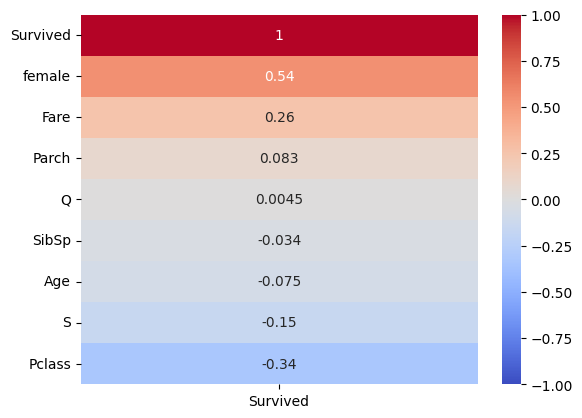

In [ ]:
datasCorr =datas.corr()
sb.heatmap(datasCorr[['Survived']].sort_values(by=['Survived'],ascending=False), vmin=-1, cmap='coolwarm', annot=True)
#Codigo sacado de https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b
#Muestra el peso de cada variable que influye en el haber sobrevivido

In [ ]:
X = datas.drop(["Survived"],axis=1)
y = datas["Survived"]

In [ ]:
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 50)
model.fit(X_ent, y_ent)
prediction = model.predict(X_pru)
accuracy_score(y_pru, prediction)

0.7528089887640449

In [ ]:
results =[]
for i in range(1,20):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_ent, y_ent)
    prediction = model.predict(X_pru)
    accuracy = accuracy_score(y_pru, prediction)
    print(f"Resultado para {i}: {accuracy}")
    results.append(accuracy)

Resultado para 1: 0.7696629213483146
Resultado para 2: 0.7696629213483146
Resultado para 3: 0.7921348314606742
Resultado para 4: 0.8033707865168539
Resultado para 5: 0.8033707865168539
Resultado para 6: 0.8089887640449438
Resultado para 7: 0.7865168539325843
Resultado para 8: 0.8033707865168539
Resultado para 9: 0.7584269662921348
Resultado para 10: 0.797752808988764
Resultado para 11: 0.7640449438202247
Resultado para 12: 0.7415730337078652
Resultado para 13: 0.7640449438202247
Resultado para 14: 0.7640449438202247
Resultado para 15: 0.7415730337078652
Resultado para 16: 0.7471910112359551
Resultado para 17: 0.7359550561797753
Resultado para 18: 0.7415730337078652
Resultado para 19: 0.7415730337078652


<Axes: >

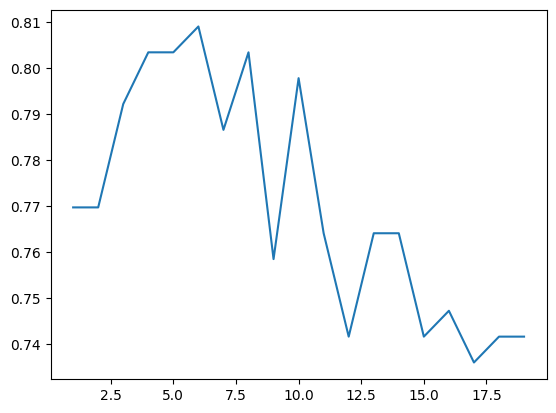

In [ ]:
sb.lineplot(x=range(1,20), y=results)
#

In [ ]:
model = DecisionTreeClassifier(max_depth = 8)
model.fit(X_ent, y_ent)
prediction = model.predict(X_pru)
accuracy_score(y_pru, prediction)

0.8033707865168539

In [ ]:
matrix = confusion_matrix(y_pru, prediction)
pd.DataFrame(matrix, columns = ["Pred : No", "Pred : Si"], index = ["Real : No", "Real : Si"])

,Pred : No,Pred : Si
Real : No,101,9
Real : Si,26,42


[Text(0.4959677419354839, 0.9444444444444444, 'female <= 0.5\n0.472\n711\n[439, 272]\nMurio'),
 Text(0.23225806451612904, 0.8333333333333334, 'Age <= 13.0\n0.298\n456\n[373, 83]\nMurio'),
 Text(0.3641129032258065, 0.8888888888888888, 'True  '),
 Text(0.06451612903225806, 0.7222222222222222, 'SibSp <= 2.5\n0.492\n32\n[14, 18]\nSobrevivio'),
 Text(0.03870967741935484, 0.6111111111111112, 'Parch <= 0.5\n0.105\n18\n[1, 17]\nSobrevivio'),
 Text(0.025806451612903226, 0.5, 'Age <= 11.5\n0.5\n2\n[1, 1]\nMurio'),
 Text(0.012903225806451613, 0.3888888888888889, '0.0\n1\n[1, 0]\nMurio'),
 Text(0.03870967741935484, 0.3888888888888889, '0.0\n1\n[0, 1]\nSobrevivio'),
 Text(0.05161290322580645, 0.5, '0.0\n16\n[0, 16]\nSobrevivio'),
 Text(0.09032258064516129, 0.6111111111111112, 'Parch <= 1.5\n0.133\n14\n[13, 1]\nMurio'),
 Text(0.07741935483870968, 0.5, '0.0\n8\n[8, 0]\nMurio'),
 Text(0.1032258064516129, 0.5, 'Age <= 3.5\n0.278\n6\n[5, 1]\nMurio'),
 Text(0.09032258064516129, 0.3888888888888889, 'SibSp

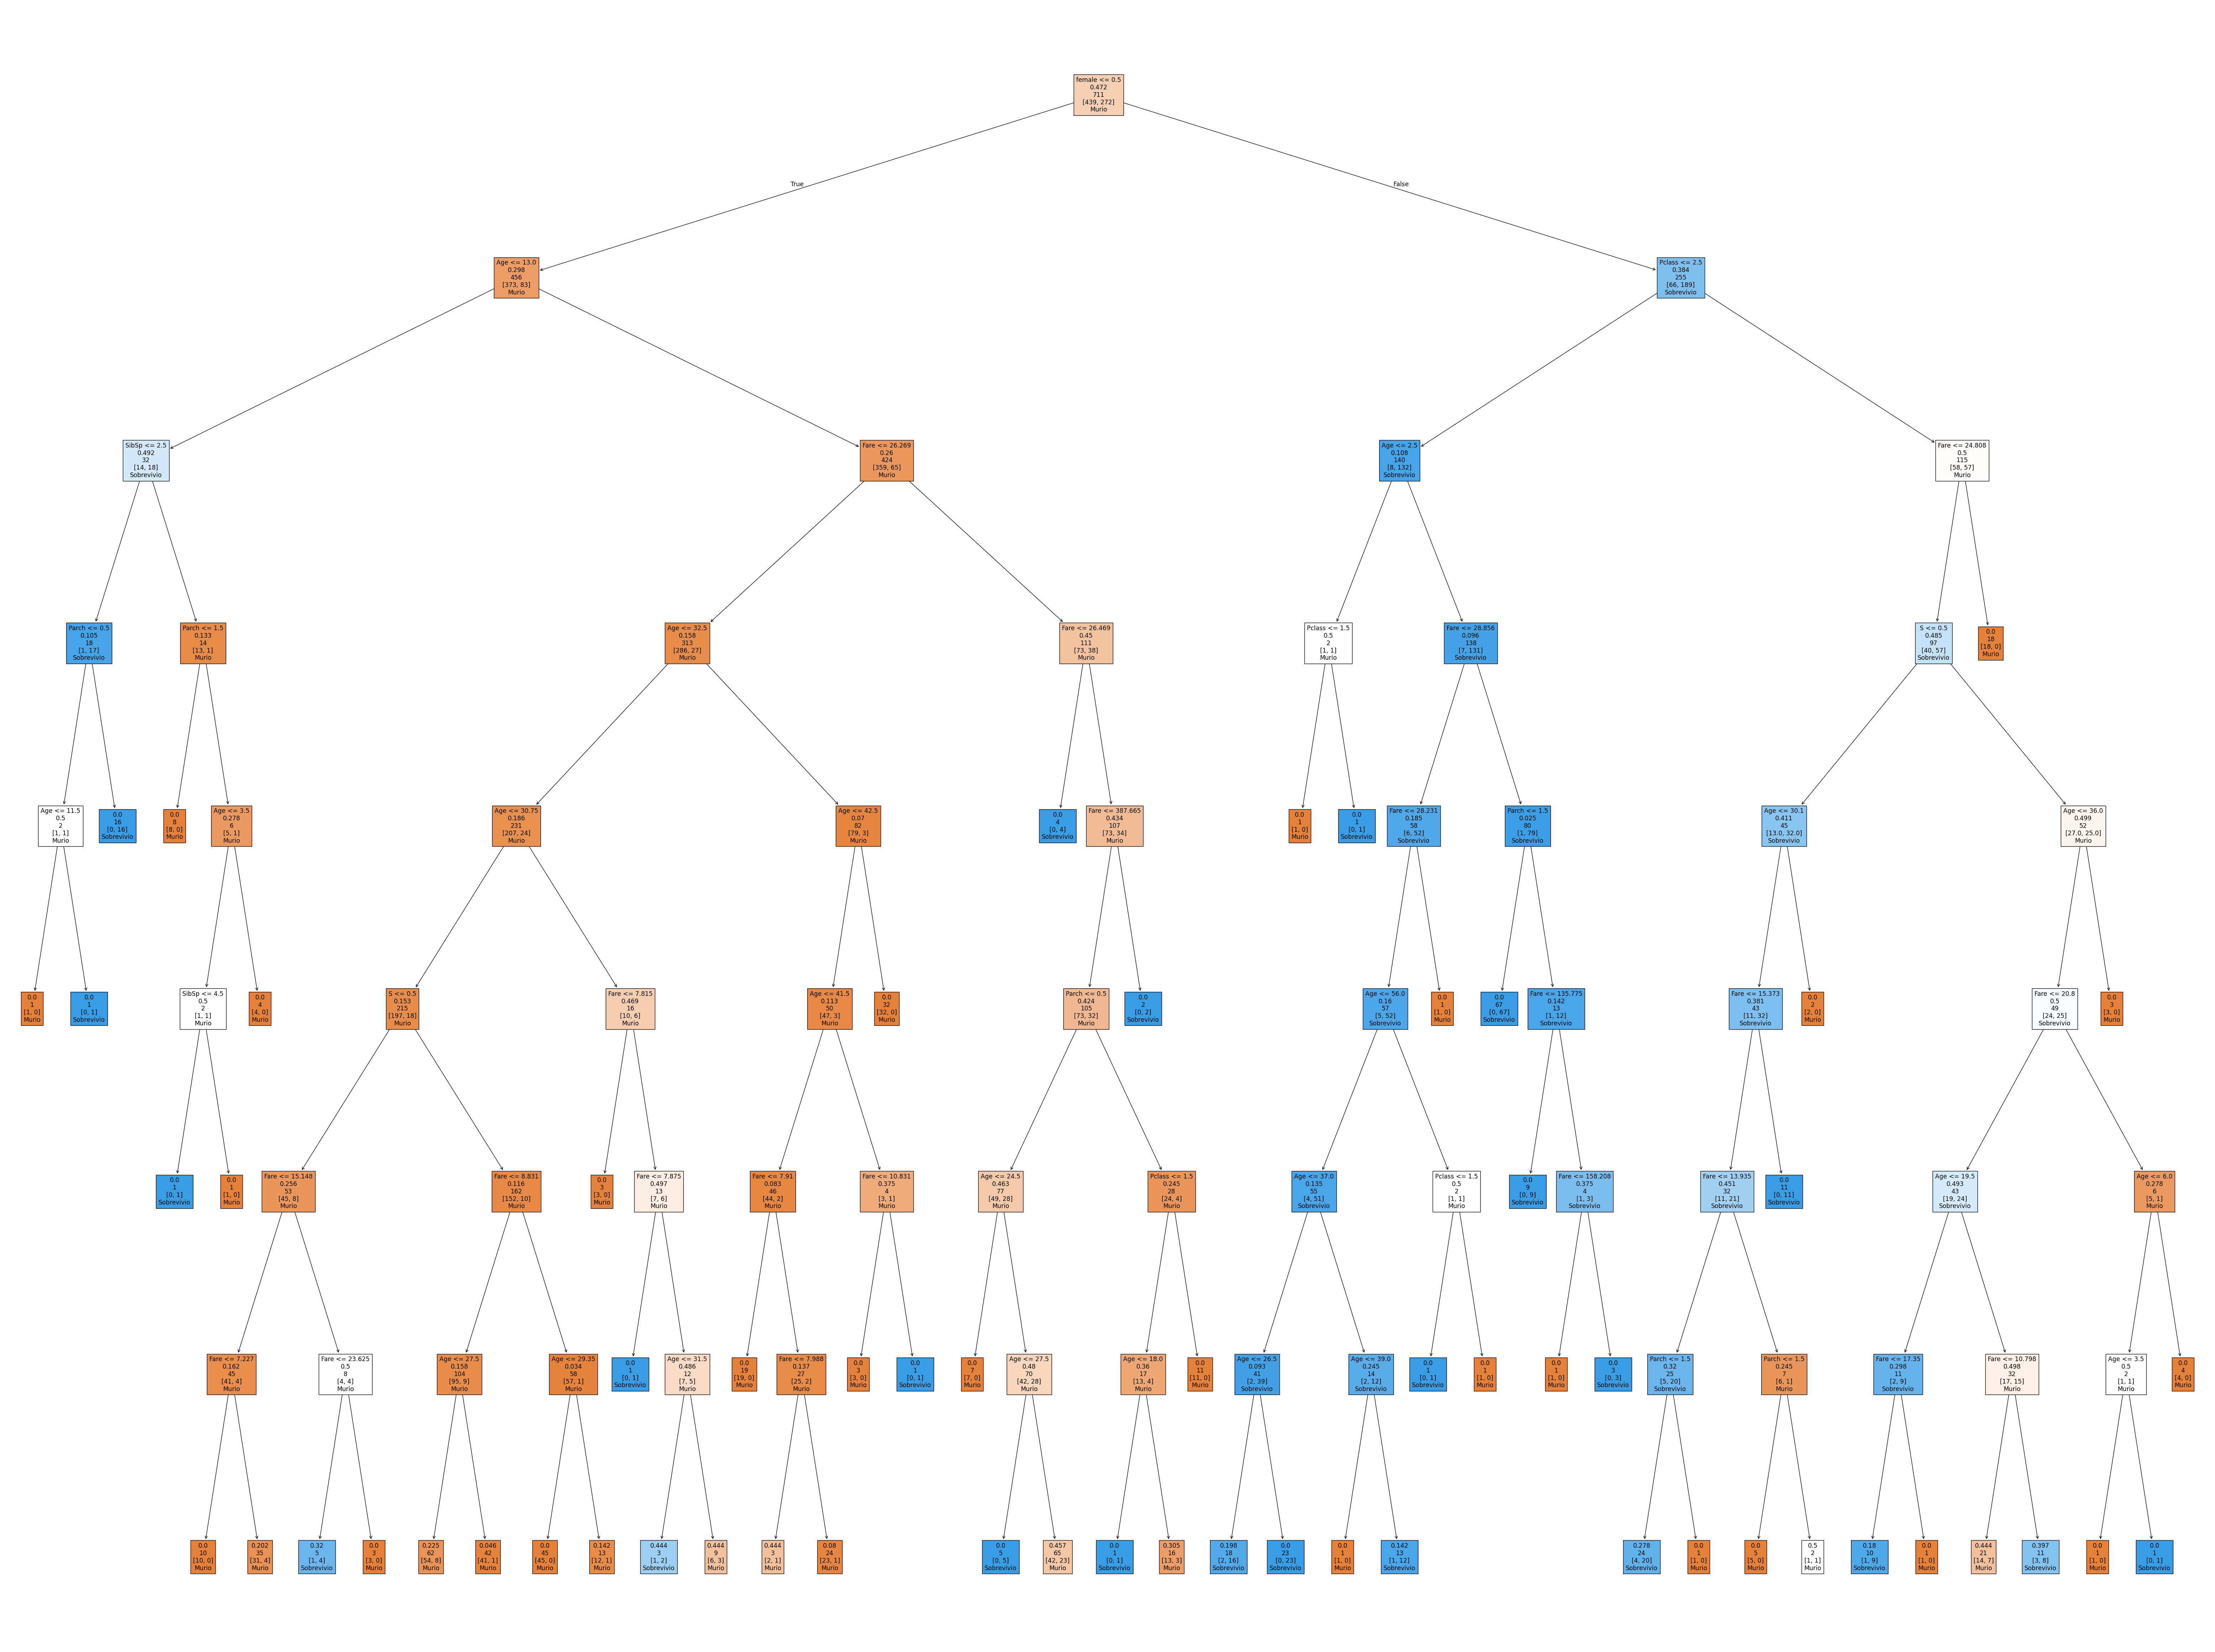

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(80,60))
plot_tree(
    model,
    feature_names = X_ent.columns,
    class_names= ["Murio","Sobrevivio"],
    filled = True,
    label = "none"
)